# Lecture 18 - Best Practices of Learning

# Review of Backpropagation

Suppose you have the data $\{x_i\}_{i=1}^N \in \mathbb{R}^D$ with labels $\{d_i\}_{i=1}^N \in \mathbb{R}^K$.

One training epoch has two stages:

1. **Forward Pass:** compute the output of every neuron (or unit) in the network using the weights (and biases) at epoch $t$, $\mathbf{w}^{(t)}$

$$y_i = \phi\left(\sum_{j=1}^M w_{ij}x_j\right)$$

where $\phi(\bullet)$ is a pre-defined activation function.

2. **Backward Pass:** compute the weight update for every weight parameter in the network.

$$w_{ij}^{(t+1)} = w_{ij}^{(t)} + \Delta w_{ij}^{t}$$

$$\Delta w_{ij} = - \eta \nabla J(w_{ij}) = -\eta \frac{\partial J}{\partial w_{ij}} = - \eta \frac{\partial J}{\partial y_j}\frac{\partial y_j}{\partial w_{ij}} = - \eta \delta_j y_i$$

$$\delta_j = - \frac{\partial J}{\partial y_j} = - \phi'(v_j)\sum_k \delta_k w_{jk}$$

From left to right: layer $i$ connected to $j$ which is connected to layer $k$.

# Defining Network Architecture

Suppose you have a set of data $\{x_i\}_{i=1}^N \in \mathbb{R}^D$. 

* What size network should you choose? How many layers? How many units per layer?

## Input Layer

* Regardless of whether you are utilizing processing the **input space** or **feature space** of a given data set, the number of neurons in the input layer is the same as the dimensionality of the space.

## Output Layer

* Suppose you are trying to do classification, then your output layer will represent the class labels.

* You can have different types of output encoding which directly impact performance.

### Output Layer Encoding (also called Feature Engineering)

* Common encoding methods for classification:
    1. Integer encoding label for each class
    2. One-hot encoding (binary vectors with one indicator for each class)
    3. Binary (or other base) encoding

## Hidden Layer

* We don't really know how many neurons to add in the hidden layer or how many hidden layers to use.

* **Rule of Thumb**: the amount of training data you need for a *well* performing model is 10x the number of parameters in the model.
    * Data will directly impact model choice...

# Gradient Descent

Backpropagation provides an approximation to the trajectory in the weight space computed by the method of **gradient descent**.

* The gradient descent is a 1st-order optimization algorithm (uses 1st derivative)

* Other methods can also be used, for example, Newton's method, a 2nd-order optimization algorithm (uses 2nd derivative)

**Delta Rule**

\begin{align}
w^{(t+1)} &= w^{(t)} - \eta \nabla J(w^{(t)})\\
\Delta w^{(t)} &= w^{(t+1)} - w^{(t)}\\
\Delta w^{(t)} &= - \eta \nabla J(w^{(t)}) \quad \text{ Error correction rule }
\end{align}

Stable values for the learning rate $\eta$ are $0 < \eta < 1$.

* When $\eta >0$ but small (e.g. $0 <\eta <0.001$), the cost function decreases, the weights are updated very slowly and the learning trajectory is smooth.

* When $\eta > 0$ but too large (e.g. $\eta>1000$), may result in large changes in the weights and cause the cost function to become unstable (oscillatory).

# Optimization Techniques with Gradient Descent

**Accelerated Gradient Descent strategies**: (1) add a momentum term, (2) use Nesterov's formula

**Adaptive Learning Rate**: (1) AdaGrad, (2) Adam

**Gradient Descent for ML**: (1) Stochastic Gradient Descent, (2) Batch/Mini-batch Gradient Descent

## Accelerated Gradient Descent

We can include a **momentum term**: it tries to increase rate of learning while avoiding instability. 

1. The **Generalized Delta Rule - Delta Rule with momentum**:

$$\Delta w_{ji}^{(t)} = \alpha \Delta w_{ji}^{(t-1)} - \eta \delta_j^{(t)} y_i^{(t)}$$

where $\alpha$ is usually set to 0.9 or a similar value, and $(t)$ stands for iteration.

Observations:
* $\Delta w_{ji}(n)$ is a the sum of exponentially weighted time series. For it to converge, $0 \leq |\alpha| < 1$
* If $\alpha = 0$, then we are operating without a momentum term

* Inclusion of momentum accelerates descent in steady down-hill directions

* Inclusion of momentum has a stabilizing effect in directions that oscillate in sign

* Momentum may prevent termination/convergence in a shallow/local minimum

* The learning rate *can* be connection dependent, $\eta_{ji}$, we can even set it to zero for some connections
* Yurii Nesterov noticed that as we reach the minima i.e the lowest point on the curve, the momentum is pretty high and it does not know to slow down at that point due to the high momentum which could cause it to miss the minima entirely and continue moving up. He introduced the now called **Nesterov accelerated gradient (NAG)**.

2. **Nesterov Accelerated Gradient (NAG)**

$$w_{ij}^{(t)} = y^{(t)} - \eta \nabla J(y^{(t)})$$

$$y^{(t)} = w_{ij}^{(t)} + \mu (w_{ij}^{(t)} - w_{ij}^{(t-1)})$$

* **Gradient Descent with momentum**: (1) computes the gradient at current location, and then (2) to that gradient, adds a momentum step in the direction of the previous gradient.

* **NAG**: (1) adds a momentum term in the direction of the previous gradient, and then (2) computes the gradient at that location.

## Adaptive Learning Rate

In addition to being able to speed up Gradient Descent, we can also **update the learning rate** to perform larger or smaller updates depending on their importance.

$$\Delta w_{ij}^{(t)} = - \eta^{(t)} \nabla J(w_{ij}^{(t)})$$

1. **AdaGrad (Adaptive Gradient algorithm, 2011)**: It simply allows the learning rate to decrease based on the parameters of the network. So it makes big updates for infrequent parameters, and small updates for frequent parameters. For this reason, it is well-suited for dealing with sparse data. Its main weakness is that its learning rate is always decreasing and decaying.

2. **RMSProp (Root Mean Squared Progagation algorithm, 2012):** RMSProp is also a method in which the learning rate is adapted for each of the parameters in the network. The idea is to divide the learning rate for a parameter by a running average of the magnitudes of recent gradients for that weight.

3. **Adam (Adaptive Moment Estimation, 2015):** Adam combines RMSProp and momentum learning. It is by far the most common method used today. Adam also computes adaptive learning rates for each parameter of the network. In this optimization algorithm, running averages of both the gradients and the second moments of the gradients are used.

# Online (Stochastic) vs Batch Learning

The number of samples used to perform a single training iteration (forward pass + backward pass) will impact the results.

* **Online Learning** (or stochastic/sequential learning): uses one sample to update the parameters of the network.
* **Batch Learning:** uses the entire training set to update the parameters of the network.

## Online Learning 

* Online learning performs local updates based on a single data sample

* One **iteration** consists of a forward pass and a backward pass

* One **epoch** consists of a pass through all training samples

* Suppose we have $N$ training samples, then one epoch has $N$ parameter updates.

* It is good practice to randomly reorder the data points between each epoch. *Why?*

* Online mode of training requires less local storage for each synaptic connection

* Online mode of training makes the search in the weight space *stochastic* in nature

## Batch Learning

* Batch learning performs *global* updates based on the entire training set

* One epoch in Batch learning, only has 1 iteration

* The errors in backward pass are the averaged error over all training samples

* Batch mode can ensure convergence to at least a local minimum

* Batch mode is easier to parallelize

* If a data set is has correlated features, online learning is more able to take advantage of this - unlike batch learning

## Mini-Batch Learning

We can consider mini-batch sets and perform updates based on each mini-batch.

* Similarly to online learning, it is common practice to create new random samples for each mini-batch set for each epoch. *Why?*

* Mini-batches need to be balanced for class representation

* Common sizes are 32, 64 and 128

# Stopping Criteria

Backpropagation cannot be shown to converge. We want it to stop at the global minimum. A necessary condition for this is $J(w^*)=0$.

## Criterion 1

The Backpropagation algorithm is considered to have converged when the Euclidean norm of the gradient vector reaches a sufficiently small threshold
* learning may take a long time
* must compute the norm of the gradient vector

## Criterion 2

The Backpropagation algorithm is considered to have converged when the absolute rate of change in the average squared error per epoch is sufficiently small.
* may result in premature termination of learning
* can test after each epoch for generalization ability, when it peaks, then stop

# Overfitting, Generalization & Cross-Validation

Generalization is mostly influenced by three factors:
1. Size of training set (may or may not have control)
2. Architecture of the network (we control)
3. Physical complexity of problem (no control)

* The goal is to reduce generalization error (error when given inputs from the test set)

* When complexity is small compared to training size, performance is generally insensitive to training data size

* As target function gets more complex, relative to training size, the size of the training set has more effect

* The Rule of thumb: 80% training, 20% testing

* We can also use cross-validation

# Other Heuristics

Include: 
1. Minimizing Information Content

2. Activation Functions

3. Data Scaling

4. Initialization

## Minimizing Information Content

* Cross-Entropy cost function
* Provide training samples that provide the largest information content
* Use example with largest training error
* Use example radically different than the ones before

* Emphasizing scheme, present more difficult patterns to the network, difficulty is determined by error
* Problems with emphasizing scheme:
    * Distribution of samples in an epoch is distorted
    * Outliers or mislabeled samples can cause major problems

## Activation Functions

MLPs may learn better with activation functions that are antisymmetric $\phi(-v) = -\phi(v)$ (e.g. hyperbolic tangent function) rather than non-symmetric (e.g. sigmoid function)
* If the activation function is non-symmetric, the output of each neuron is restricted to the interval $[0,1]$. Such a choice introduces a source of systematic bias for those neurons located beyond the first layer of the network.

* With an antisymmetric activation function, the output of each neuron is permitted to assume both positive and negative values in the interval $[-1,1]$, in which case it is likely for its mean to be zero.
* If the network connectivity is large, backpropagation learning with anti-symmetric activation functions can yield faster convergence than a similar process with non-symmetric, for which there is also empirical evidence.

## Data Scaling

Data scaling is an important step of a ML system and an MLP is no different.

* For the learning time to be minimized, the use of *non-zero mean inputs should be avoided*
* It is good if the input variables are uncorrelated
* It is good if variances are approximately equal (standardization)

## Initialization

The initialization of the weights of neural networks is a whole field of study as the careful initialization of the network can speed up the learning process.

Most common: small Normal random values.

Other methods include: zeros, ones, constant, uniformly random, truncated Normal random, orthogonal, identity, LeCun uniform, LeCun normal,  He uniform, He normal, Xavier uniform, Xavier normal.

# Network Pruning Techniques

* **Network Growing**: Start with a small MLP and add to it when unable to meet design specifications

* **Network Pruning**: Start with a large MLP and prune it by eliminating weights (driving them to zero)

* **Complexity Regularization**: Need an appropriate trade-off between reliability of training data and goodness of the model/NN architecture

* We can find trade-off my minimizing the total risk: 

$$R(w) = J_e(w)+ \lambda J_c(w)$$ 

where $J_e$ is the performance/error measure, $J_c$ is the complexity penalty, and $\lambda$ is a regularization parameter that represents the relative importance of the complexity penalty with respect to the performance measure term.
* $\lambda = 0$: Training based only on training samples
* $\lambda \rightarrow \infty$: Training samples are unreliable, minimize complexity

1. **Weight Decay:** $J_c(w) = \Vert w\Vert_2^2 = \sum_i w_i^2$

2. **Weight Sparsity:** $J_c(w) = |w| = \sum_i |w_i|$

3. **Weight Elimination:**
$$ J_c(w) = \sum_i \frac{\left(\frac{w_i}{w_0}\right)^2}{1+\left(\frac{w_i}{w_0}\right)^2}$$

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

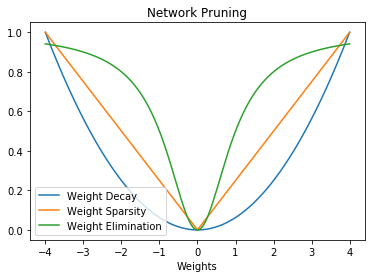

In [19]:
N = 1000
w = np.linspace(-4,4,N)
w0 = 1
Jc1 = w**2/np.max(w**2)
Jc2 = np.abs(w)/np.max(np.abs(w))
Jc3 = (w/w0)**2/ (1 + (w/w0)**2)

plt.plot(w, Jc1, label = 'Weight Decay'); 
plt.plot(w, Jc2, label = 'Weight Sparsity');
plt.plot(w, Jc3, label = 'Weight Elimination'); 
plt.legend(loc='lower left')
plt.title("Network Pruning"); 
plt.xlabel("Weights");

# Decision Maps in MLPs

[A Neural Network Playground](https://playground.tensorflow.org/#activation=tanh&regularization=L2&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.1&regularizationRate=0&noise=10&networkShape=2&seed=0.66302&showTestData=false&discretize=false&percTrainData=80&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false) is a great tool to provide visual interpretation of MLPs performance. You can choose and interpret the effect of the use of different features, architecture size, learning rate, among others.

# Example: IRIS Dataset

Iris data set from the UCI Repository: https://archive.ics.uci.edu/ml/datasets/Iris

* Samples: 150

* Features: 4 (sepal length in cm, sepal width in cm, petal length in cm, petal width in cm)

* Classes: 3 (setosa, versicolor and virginica)

In [85]:
from sklearn import datasets
iris = datasets.load_iris()

X = iris.data
y = iris.target

print(X.shape, y.shape, iris.target_names)

(150, 4) (150,) ['setosa' 'versicolor' 'virginica']


In [86]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

In [87]:
from sklearn.neural_network import MLPClassifier

?MLPClassifier

In [88]:
net = MLPClassifier(activation='tanh', solver='adam', alpha=1e-5,
                    batch_size = 20, learning_rate_init = 0.2, 
                    hidden_layer_sizes=(2), early_stopping = True, 
                    random_state=1)
print(net.fit(Xtrain, ytrain))

MLPClassifier(activation='tanh', alpha=1e-05, batch_size=20, beta_1=0.9,
              beta_2=0.999, early_stopping=True, epsilon=1e-08,
              hidden_layer_sizes=2, learning_rate='constant',
              learning_rate_init=0.2, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)


In [89]:
print("weights between input and hidden layer:")
print(net.coefs_[0])
print("\nweights between hidden and output layer:")
print(net.coefs_[1])

weights between input and hidden layer:
[[ 0.80534102 -0.27427   ]
 [-0.45568873  1.36664787]
 [-1.51085676 -2.09425135]
 [-1.92932625 -1.05890784]]

weights between hidden and output layer:
[[ 1.37407217  0.84384195 -2.20936116]
 [ 2.83764733 -1.52634717 -1.2677418 ]]


In [90]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

y_predtrain = net.predict(Xtrain)
y_predtest = net.predict(Xtest)

accuracy_train = accuracy_score(ytrain, y_predtrain)
accuracy_test = accuracy_score(ytest, y_predtest)

In [91]:
print("Accuracy in the Train set= ", accuracy_train*100, '%')
print("Accuracy in the Test set= ", accuracy_test*100, '%')

print("Confusion matrix:")
confusion_matrix(ytest, y_predtest)

Accuracy in the Train set=  92.5 %
Accuracy in the Test set=  96.66666666666667 %
Confusion matrix:


array([[10,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 11]], dtype=int64)

In [98]:
from matplotlib.colors import ListedColormap

from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier

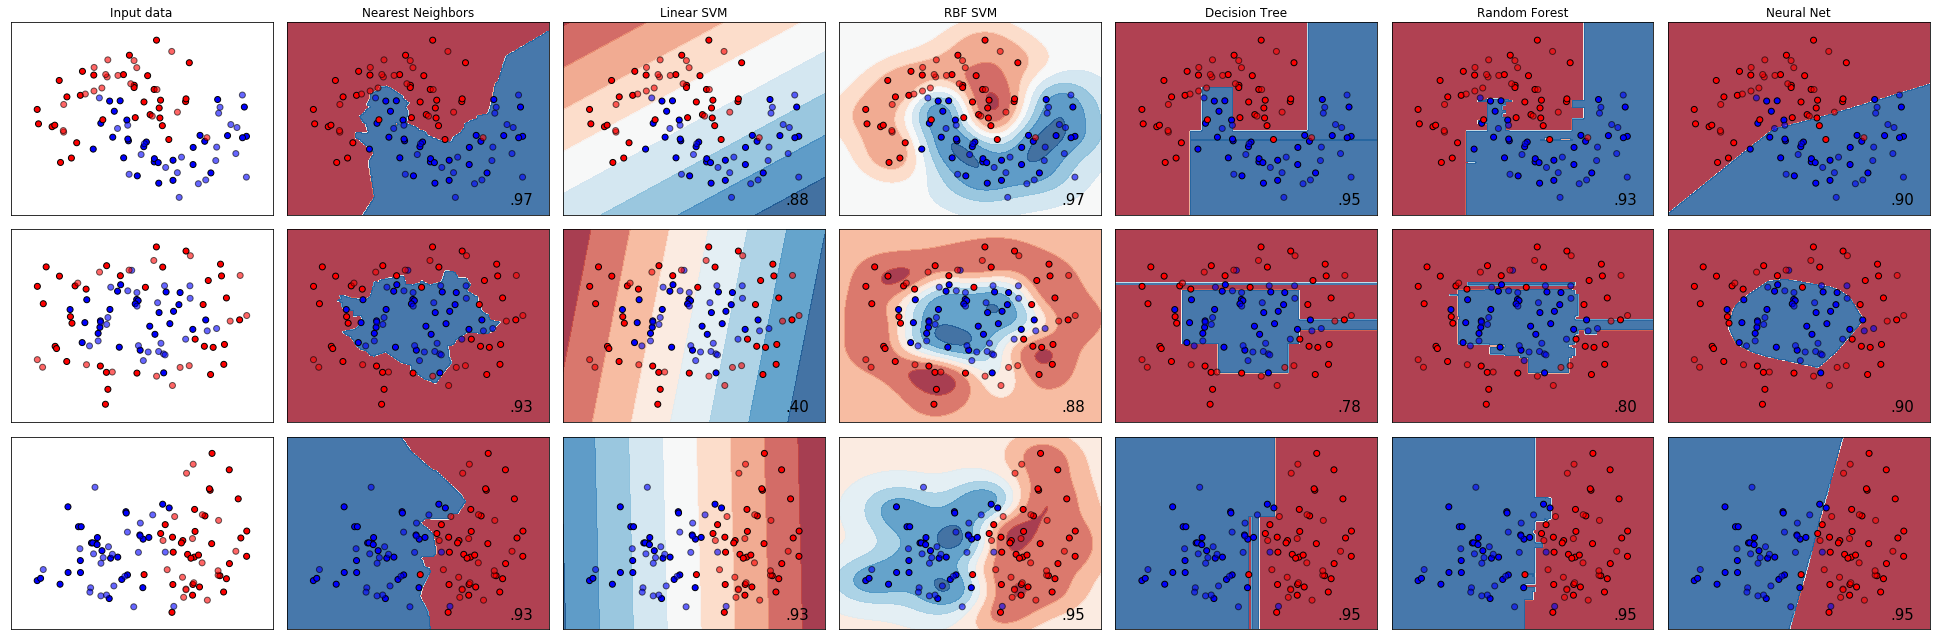

In [100]:
h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM",
         "Decision Tree", "Random Forest", "Neural Net"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5, random_state=0),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1, random_state=0),
    MLPClassifier(alpha=1, max_iter=1000)]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
#             Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
            Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()

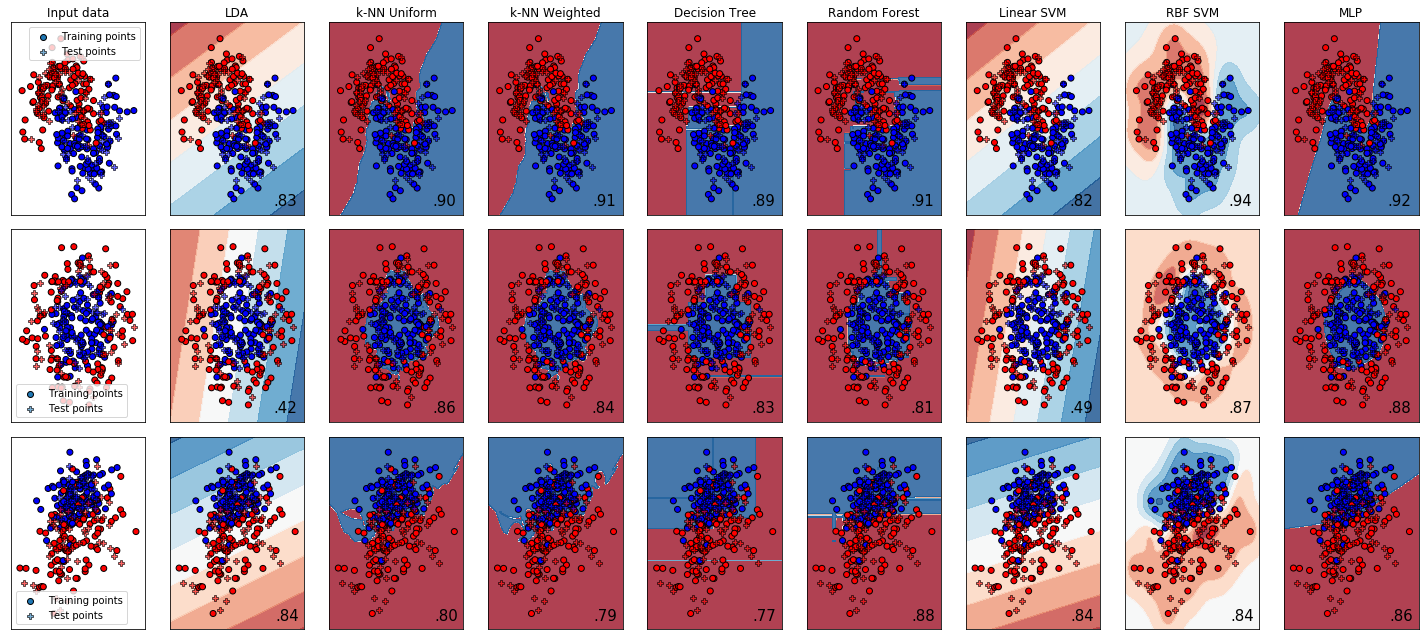

In [103]:
# Source: https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py

# figure parameters
h = .02  # step size in the mesh
figure = plt.figure(figsize=(20, 9))

# set up classifiers
n_neighbors = 5
classifiers = [LDA(),\
               KNeighborsClassifier(n_neighbors, weights='uniform', metric='euclidean'), \
               KNeighborsClassifier(n_neighbors, weights='distance', metric='euclidean'),\
               DecisionTreeClassifier(max_depth=5),\
               RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),\
               SVC(kernel="linear", C=0.025),\
               SVC(gamma=2, C=1),\
               MLPClassifier(max_iter=1000)
              ]
names = ["LDA","k-NN Uniform", "k-NN Weighted","Decision Tree", \
         "Random Forest", "Linear SVM", "RBF SVM", "MLP"]

# Put together Data Sets
n_samples = 300
X, y = make_classification(n_samples=n_samples, n_features=2, n_redundant=0, n_informative=2,
                           random_state=0, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2*rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0,n_samples=n_samples),
            make_circles(noise=0.2, factor=0.5, random_state=1,n_samples=n_samples),
            linearly_separable
            ]

i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.3, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k',label='Training points')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], marker='P', c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k',label='Test points')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.legend()
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
#             Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], marker='P', c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()